<a href="https://colab.research.google.com/github/dheerajreddy2020/Live-Fire-detection-and-Localization-using-surveillance-cameras/blob/master/Yolo_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drive link for the files
https://drive.google.com/drive/folders/1K9W4wN7YgzgVBl97NyWQ5_1UffEEXztx?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/YOLO_train/darknet_for_colab')

In [ ]:
import glob
#for name in glob.glob('fire_images/*.jpg'):
images_loc = glob.glob('data/fire_images/*.jpg')

In [ ]:
number_of_train = 48
no_of_test = 12
train_file = open('train.txt','w')
test_file = open('test.txt','w')
train_file.writelines(images_loc[:number_of_train])
test_file.writelines(images_loc[-no_of_test:])

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make
!chmod +x ./darknet

chmod +x *.sh


In [ ]:
os.chdir('darknet')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/YOLO_train/darknet'

## Visualizing the dataset

1.txt: 
0 0.530516 0.375000 0.356808 0.291667

11.txt: 
0 0.348333 0.527500 0.423333 0.400000
0 0.760000 0.617500 0.353333 0.710000

12.txt: 
0 0.550420 0.408955 0.394958 0.776119
0 0.260504 0.753731 0.171429 0.450746

16.txt: 
0 0.173828 0.628906 0.255859 0.341146
0 0.404297 0.500651 0.185547 0.368490
0 0.626953 0.472656 0.207031 0.333333
0 0.806641 0.577474 0.136719 0.290365
0 0.920898 0.641927 0.076172 0.278646



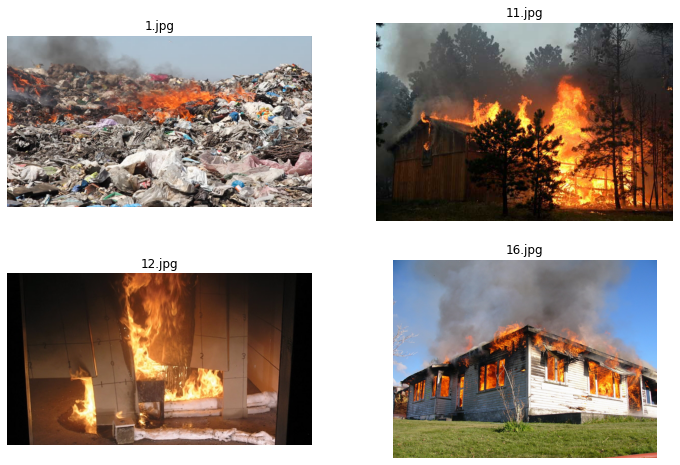

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = images_loc
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [ ]:
!python yolov4_setup.py

[INFO] Generating yolov4_custom_train.cfg successfully...
[INFO] Generating yolov4_custom_test.cfg successfully...


In [ ]:
!./darknet detector train data/yolov4.data cfg/yolov4_custom_train.cfg yolov4.conv.137 -dont_show -map

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 4, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x